# Research for bivariate and univariate MLE between Brain Diseases
## Analysis with univariate and bivariate MLE between the diagnosis group of "Alzheimer's Disease", "Mild Cognitive Impariment", and "Cognitive Normal".
---


#### Introduction to Brain and Machine Learning, 2020-2
#### Professor: Prof. Seok. ,Korea University

#### All codes are written by John Leo



## **Code Flow**



---


## 1. Grouping the data by each diagnosis group

>Group the data from the raw data(csv file) according to diagnosis group.



---


## 2. Defining the classes

> This codes have a 4 classes for

> (1) Cal: 
- Calculate the mean, variance, deviation, covariance from the data.

> (2) Class:
- Group the data to class0, class1, class2 for the diagnosis group 
  by 'cognitive normal', 'mild cognitive impariment, 'alzheimer's disease'.
- Each class has methods for getting mean, variance, dataframe, deviation etc.

> (3) MLE:
- Compute the univariate MLE for the each class by 'Hippocampus' and 'Entorhinal'.
- Compute the multivariate MLE for the each class with 'Hippocampus' and 'Entorhinal'.
- List the Probabilities from the computed results.
- Each MLE Class contain a method for confirming whether the sum of the all probabilities is near 1

> (4) Plot:
- Class for plotting the univariate and multivariate MLE for each diagnosis group


---



## **3. Plot the MLE for each class (class0, class1, class2)**
> - Plot the univariate MLE for each diagnosis group by Hippocampus and Entorhinal
- Plot the bivariate MLE for each diagnosis group with Hippocampus and Entorhinal


---


## **4. My Analysis in regard to the resulting figures**
- **1. Analysis of Univariate MLEs for each diagnosis group**
> **1-1.** Univariate MLEs of Hippocampus for each diagnosis group

    > **1-2.** Univariate MLEs of Entorhinal for each diagnosis group

- **2. Analysis of Bivariate MLEs for each diagnosis group**
> **2-1.** Comparing the Covariance for each diagnosis group
    
    >**2-2.** Comparing the sag for each plotted graph of diagnosis group

- Summary
---
---



# **1. Grouping the data by each diagnosis group**


---


- **Class0: Cognitive Normal**
- **Class1: Mild Cognitive Impariment**
- **Class2: Alzheimers' Disease**

In [ ]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#define dataframe from the csv file

df = pd.read_csv('/content/drive/My Drive/alzheimers_disease_dataset.csv')

#Filter and define classData as class0Data, class1Data, class2Data from the data

class0Data = df[df.Class == 0]

class1Data = df[df.Class == 1]

class2Data = df[df.Class == 2]

#**2. Defining the classes**


## **::Cal::**
#### **Examples of Methods**


---


- **Cal.Covariance(rows_Hippocampus, rows_Entorhinal)**
##### Get Covariance of Hippocampus and Entorhinal from the rows
- **Cal.Mean(rows_Hippocampus/ rows_Entorhinal)**
##### Get Mean of Hippocampus or Entorhinal from the rows
- **Cal.Deviation(rows_Hippocampus/ rows_Entorhinal)**
##### Get Deviation of Hippocampus and Entorhinal from the rows
- **Cal.Variance(rows_Hippocampus, rows_Entorhinal)**
##### Get Variance of Hippocampus and Entorhinal from the rows


In [ ]:
# class Calculator of Mean and Variance

class Cal:

  @staticmethod
  def Mean(data):
    sum = 0
    for volume in data:
      sum = sum + volume
    return sum / len(data)

  @staticmethod
  def Variance(data):

    #Mean of square Mean

    def squareMean(data):
      sum = 0
      for volume in data:
        sum = sum + np.square(volume)
      return sum / len(data)

    #Square of the Mean
    
    def MeanSqaure(data):
      sum = 0
      for volume in data:
        sum = sum + volume
      return np.square(sum / len(data))
    
    return squareMean(data) - MeanSqaure(data)

  @staticmethod
  def Deviation(data):
    return np.sqrt(Cal.Variance(data))

  @staticmethod
  def Covariance(data1, data2):
    data1M = Cal.Mean(data1)
    data2M = Cal.Mean(data2)
    return sum((one - data1M) *(two - data2M) for one, two in zip(data1, data2)) * (1 / (len(data1) - 1))

##**::Class::**
####**Examples of Methods**


---


- **Class0.DataFrame()**
##### Get the DataFrame of Class0 (Cognitive Normal)
- **Class0.HippoCampus()**
##### Get the DataFrame of Hippocampus of Class0
- **Class0.Entorhinal()**
##### Get the DataFrame of Hippocampus of Class0
- **Class0.Mean(datatype)**
##### Get the Mean of datatype('Entorhinal' or 'Hippocampus') of Class0
- **Class0.Deviation(datatype)**
##### Get the Deviation of datatype('Entorhinal' or 'Hippocampus') of Class0
- **Class0.Variance(datatype)**
##### Get the Variance of datatype('Entorhinal' or 'Hippocampus') of Class0
- **Class0.Covariance()**
##### Get the Covariance of Class0

- **Class0.Ranger(datatype)**
##### Get the range of Class0 
##### start = Min of datatype('Entorhinal or 'Hippocampus') of Class0
##### end = Max of datatype('Entorhinal or 'Hippocampus') of Class0

In [ ]:
# class Class (class0, class1, class2)

class Class:
  def __init__(self, data):
    self.data = data

  #DataFrame of the class
  def DataFrame(self):
    return self.data
  
  # HippoCampus dataframe from the class
  def HippoCampus(self):
    return self.data.iloc[:,0:3]

  # Entorhinal dataframe from the class
  def Entorhinal(self):
    return self.data[['ID', 'Class', 'Entorhinal']]
  
  #datatype is whether 'Hippocampus' or 'Entorphinal'
  def Mean(self, datatype):
    return Cal.Mean(self.data[datatype])

  def Variance(self, datatype):
    return Cal.Variance(self.data[datatype])

  def Deviation(self, datatype):
    return Cal.Deviation(self.data[datatype])

  def Covariance(self):
    return Cal.Covariance(self.data['Hippocampus'], self.data['Entorhinal'])

  def Ranger(self, datatype):
    return range(self.data[datatype].min(), self.data[datatype].max())


#Define the classes with classData

class0 = Class(class0Data)
class1 = Class(class1Data)
class2 = Class(class2Data)

## **::MLE::**

#### **Examples of Methods**


---


##### **Univariate MLE**
- **Class0MLE.Hippocampus()**
#### #List the densities of Hippocampus MLE values from the Class0(Cognitive normal).
- **Class0MLE.Entorhinal()**
##### List the densities of Hippocampus MLE values from the Class0.
- **Class0MLE.uniConfirmProb(Datatype)**
##### Check whether the sum of the desity from the univariate MLE of Datatype('Entorhinal' or 'Hippocampus') from Class 0 is near 1.


---


##### **Bivariate MLE**
- **Significant Notice**
##### **1.** The default **interval (nStep in Code) of computing bivariate MLE about Hippocampus and Entorhinal volume is set to 50**.
##### **2.Since the Probability Density Function computed with interval for each axes, the probability of each point derived from bivariate MLE is multiplied with nStep * nStep**.
---
- **Class0MLE.bivariate(X, Y)**
##### Compute and set the matrix of the densities from Bivariate MLE with Hippocampus and Entorhinal from the Class0.
- **Class0MLE.biConfirmProb()**
##### Check whether the sum of the density from the bivariate MLE from Class0 is near 1.
-**Class0MLE.getZ(X, Y)**
##### This gives a Matrix to MLE Plotter by computing bivariate MLE (Class0MLE.bivariate()) and set the point of Matrix with X, Y.

---


##### **Class init arguments for Bivariate MLE**
The default values for start and max volume are set to approximation of minimum and maximum volume for the each Hippocampus and Entorhinal through out all classes.
- **nHippoStartVolume (Default 2000)**
##### StartVolume of the Hippocampus

- **nEntorStartVolume (Default 1000)**
##### StartVolume of the Entorhinal

- **nStep (Default 50)**
##### **Interval Step for computing the Bivariate MLE**

- **nHippoMaxVolume (Default 12000)**
##### Max volume of the Hippocampus

- **nEntorMaxVolume (Default 6000)**
##### Max volume of the Entorhinal

- **nHippoCellNo (Default 200)**
##### (nHippoMaxVolume - nHippoStartVolume) / nStep

- **nEntorCellNo (Default 100)**
##### (nEntorMaxVolume - nEntorStartVolume) / nStep

In [ ]:
# Class MLE

class MLE:
  def __init__(self, data, classNo, nHippoStartVolume = 2000, nEntorStartVolume = 1000, nStep = 50, nHippoMaxVolume = 12000, nEntorMaxVolume = 6000):
    self.data = data
    self.classNo = classNo
    self.Cov = Cal.Covariance(self.data['Hippocampus'], self.data['Entorhinal'])
    self.Variance = [Cal.Variance(self.data['Hippocampus']), Cal.Variance(self.data['Entorhinal'])]
    self.Mean = [Cal.Mean(self.data['Hippocampus']), Cal.Mean(self.data['Entorhinal'])]
    self.Deviation = [Cal.Deviation(self.data['Hippocampus']), Cal.Deviation(self.data['Entorhinal'])]
    self.nHippoStartVolume = nHippoStartVolume
    self.nEntorStartVolume = nEntorStartVolume
    self.nStep = nStep
    self.nHippoMaxVolume = nHippoMaxVolume
    self.nEntorMaxVolume = nEntorMaxVolume
    self.nHippoCellNo = int((self.nHippoMaxVolume - self.nHippoStartVolume) / self.nStep)
    self.nEntorCellNo = int((self.nEntorMaxVolume - self.nEntorStartVolume) / self.nStep)
    self.matrixZ = np.zeros(shape=(self.nHippoCellNo, self.nEntorCellNo))#Initialize nHippoCell X nEntorCell Matrix
    self.biProb_Sum = 0
  
  #Univariate MLE method for each class

  def univariate(self, volume, datatype):
    nParm_1  =  1 /  np.sqrt( 2 * np.pi * np.square(self.Deviation[datatype]))
    nParm_2  =  np.exp( - ( volume - self.Mean[datatype]) * ( volume - self.Mean[datatype])  / ( 2 * np.square(self.Deviation[datatype])) )
    return nParm_1 * nParm_2

  #MBivariate MLE method for each class

  def bivariate(self):
    Prob_Sum = 0
    for yIndex in range(self.nEntorCellNo): #Entorhinal

        Y = yIndex * self.nStep

        for xIndex in range(self.nHippoCellNo): #Hippocampus

            X = xIndex * self.nStep

            V = np.array([[self.Variance[0], self.Cov], [self.Cov, self.Variance[1]]])
            detV = np.linalg.det(V)
            
            M = np.array([[X - self.Mean[0], Y - self.Mean[1]]])

            nPi_2_V = 2 * np.pi * np.sqrt(detV)
            
            Prob = (1 / nPi_2_V) * np.exp( -(1/2) * M @ np.linalg.inv(V) @ M.transpose() )
            # Since the Probability Density Function computed with interval (nStep) for each axes,
            # the probability of each point multiplied with nStep * nStep
            nProb = Prob * self.nStep * self.nStep
            self.matrixZ[xIndex,yIndex] = nProb
            Prob_Sum = Prob_Sum + nProb
    self.biProb_Sum = Prob_Sum


  # List the probabilities from the results from univariate MLE

  def lister(self, datatype, compare = False):
    
    if datatype == 'Hippocampus':
      index = 0
    else:
      index = 1

    if self.classNo == 0:
      ranger = class0.Ranger(datatype)
    elif self.classNo == 1:
      ranger = class1.Ranger(datatype)
    elif self.classNo == 2:
      ranger = class2.Ranger(datatype)

    lists = []

    # arg_compare means that whether the list is for comparision graph.
    # if (Compare is True), the range should be same between classes for comparision.
    if compare: 
      if datatype == 'Entorhinal':
        ranger = range(self.nEntorStartVolume, self.nEntorMaxVolume)
      else:
        ranger = range(self.nHippoStartVolume, self.nHippoMaxVolume)

    for volume in ranger:
      lists.append(self.univariate(volume, index))
    return lists

  #Return the Matrix from the results of bivariate MLE

  def getZ(self, X, Y):
    self.bivariate()
    xCell = ( (X - self.nHippoStartVolume) / (self.nStep) ).astype(int)
    yCell = ( (Y - self.nEntorStartVolume) / (self.nStep) ).astype(int)
    return self.matrixZ[xCell, yCell]

    

  #Univariate MLE Hippocampus lister
  def Hippocampus(self, compare= False):
    return self.lister('Hippocampus', compare)

  #Univaraite MLE Entorhinal lister
  def Entorhinal(self, compare= False):
    return self.lister('Entorhinal', compare)


  #Check whether the SUM OF PROBABILITIES FROM THE UNIVARIATE IS NEAR 1
  def uniconfirmProb(self, datatype):
    sum = 0
    for prob in self.lister(datatype):
      sum = sum + prob
    return sum

  #Check whether the SUM OF PROBABILITIES FROM THE BIVARIATE IS NEAR 1
  def biconfirmProb(self):
    self.bivariate()
    return self.biProb_Sum



#DEFINE THE MLE by classes

class0MLE = MLE(class0Data, 0)
class1MLE = MLE(class1Data, 1)
class2MLE = MLE(class2Data, 2)

## **::PLOT::**
#### **Examples of Methods**


---


##### **Univariate MLE Plot**
- **Plot.univariatePlotter(title, xlabel, ylabel, xData, yData)**
##### Plot the univariate MLE of Class(0, 1, 2)
- **Plot.univariatePlotterGroup(title, xlabel, ylabel, xData1, yData2, yData3)**
##### Plot the Comparision of univariate MLEs of Class0, Class1, Class2


---


##### **Bivariate MLE Plot**
- **Plot.bivariatePlotter(classNo)**
##### Plot the bivariate MLE of Class(0, 1, 2)
- **Plot.bivariatePlotterGroup(classNo)**
##### Plot the Comparison of bivariate MLEs of Class0, Class1, Class2

In [ ]:
class Plot:
  @staticmethod
  def univariatePlotter(title, xlabel, ylabel, xData, yData):
    plt.plot(xData, yData)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

  @staticmethod
  def univariatePlotterGroup(title, xlabel, ylabel, xData, yData1, yData2, yData3):
    plt.plot(xData, yData1, label = 'Class 0')
    plt.plot(xData, yData2, label='Class 1')
    plt.plot(xData, yData3, label='Class 2')
    plt.legend(['Class 0', 'Class 1', 'Class 2'])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

  @staticmethod
  def bivariatePlotter(classNo):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # np.linspace(startVolume, maxVolume - 1 (not contain last index), cellNo)
    x = np.linspace(2000, 12000 - 1, 200) #(nHippoMaxVolume:12000 - nHippoStartVolume:2000) / (nStep:50) = 200
    y = np.linspace(1000, 6000 - 1, 100) #(nEntorMaxVolume:6000 - nEntorStartVolume:1000) / (nStep:50) = 100
    X, Y = np.meshgrid(x, y)
    if classNo == 0:
      Z = class0MLE.getZ(X, Y)
      color = 'red'
    elif classNo == 1:
      Z = class1MLE.getZ(X, Y)
      color = 'blue'
    elif classNo == 2:
      Z = class2MLE.getZ(X, Y)
      color= 'green'
    ax.plot_wireframe(X, Y, Z, color =color)
    title = 'Bivariate MLE of class {}'.format(classNo)
    ax.set_title(title)
    plt.show()

  @staticmethod
  def bivariatePlotterGroup():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.linspace(2000, 12000 - 1, 200)
    y = np.linspace(1000, 6000 - 1, 100)
    X, Y = np.meshgrid(x, y)
    Z0 = class0MLE.getZ(X, Y)
    Z1 = class1MLE.getZ(X, Y)
    Z2 = class2MLE.getZ(X, Y)
    ax.plot_wireframe(X, Y, Z0, color ='red')
    ax.plot_wireframe(X, Y, Z1, color ='blue')
    ax.plot_wireframe(X, Y, Z2, color ='green')
    plt.legend(['Class 0', 'Class 1', 'Class 2'])
    ax.set_title("Comparision of Bivariate\n  MLEs from each Class")
    plt.show()

#**3. Plot Univariate and Multivariate MLE for each diagnosis group**


---




##**Feature 1. Hippocampus univariate MLE for each diagnosis group**


---


1. **Comparision of Hippocampus univariate MLEs of each Class**

2. **Hippocampus Univariate MLE of Class0: Cognitive normal Group**

3. **Hippocampus Univariate MLE of Class1: Mild Cognitive Impariment Group**

4. **Hippocampus Univariate MLE of Class2: Alzheimer's Disease Group**

Feature 1. (Hippocampus) univariate MLE for each diagnosis group



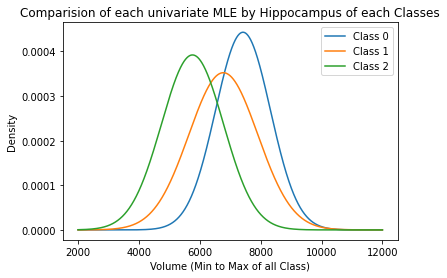

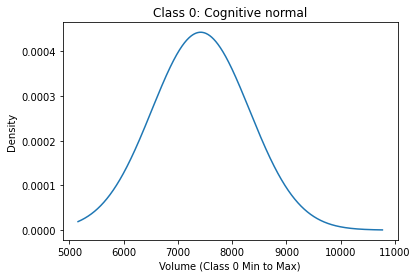

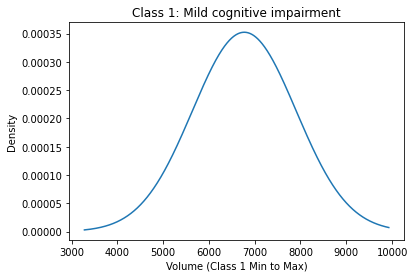

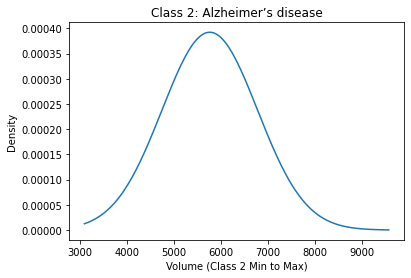

In [ ]:
print('Feature 1. (Hippocampus) univariate MLE for each diagnosis group', end='\n\n')

Plot.univariatePlotterGroup('Comparision of each univariate MLE by Hippocampus of each Classes', 'Volume (Min to Max of all Class)', 'Density', range(2000, 12000), class0MLE.Hippocampus(True), class1MLE.Hippocampus(True), class2MLE.Hippocampus(True))
Plot.univariatePlotter('Class 0: Cognitive normal', 'Volume (Class 0 Min to Max)', 'Density', class0.Ranger('Hippocampus'), class0MLE.Hippocampus())
Plot.univariatePlotter('Class 1: Mild cognitive impairment', 'Volume (Class 1 Min to Max)', 'Density', class1.Ranger('Hippocampus'), class1MLE.Hippocampus())
Plot.univariatePlotter('Class 2: Alzheimer’s disease', 'Volume (Class 2 Min to Max)', 'Density', class2.Ranger('Hippocampus'), class2MLE.Hippocampus())
print('')

## **Feature 2. Entorhinal univariate MLE for each diagnosis group**


---


1. **Comparision of Entorhinal univariate MLEs of each Class**

2. **Entorhinal Univariate MLE of Class0: Cognitive normal Group**

3. **Entorhinal Univariate MLE of Class1: Mild Cognitive Impariment Group**

4. **Entorhinal Univariate MLE of Class2: Alzheimer's Disease**

Feature 2 (Entorhinal) univariate MLE for each diagnosis group



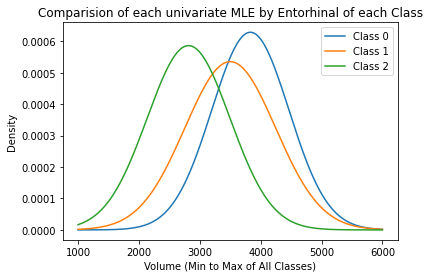

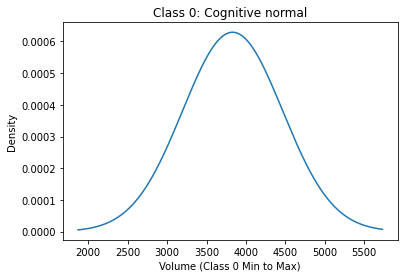

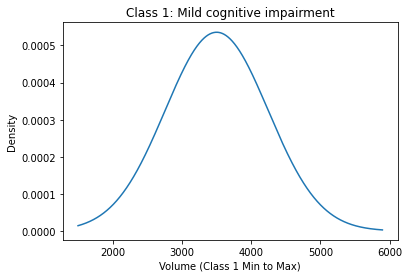

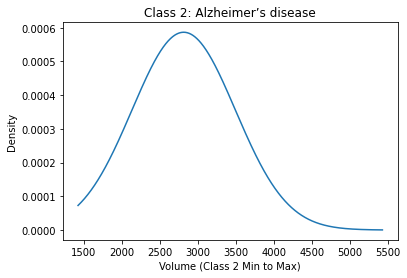

In [ ]:
print('Feature 2 (Entorhinal) univariate MLE for each diagnosis group', end='\n\n')

Plot.univariatePlotterGroup('Comparision of each univariate MLE by Entorhinal of each Class', 'Volume (Min to Max of All Classes)', 'Density', range(1000, 6000), class0MLE.Entorhinal(True), class1MLE.Entorhinal(True), class2MLE.Entorhinal(True))
Plot.univariatePlotter('Class 0: Cognitive normal', 'Volume (Class 0 Min to Max)', 'Density', class0.Ranger('Entorhinal'), class0MLE.Entorhinal())
Plot.univariatePlotter('Class 1: Mild cognitive impairment', 'Volume (Class 1 Min to Max)', 'Density', class1.Ranger('Entorhinal'), class1MLE.Entorhinal())
Plot.univariatePlotter('Class 2: Alzheimer’s disease', 'Volume (Class 2 Min to Max)', 'Density', class2.Ranger('Entorhinal'), class2MLE.Entorhinal())
print('')


##**Feature 3. Hippocampus/Entorhinal cortex bivariate MLE for each diagnosis group**


---


1. **Comparision of Bivariate MLEs by each Class**
2. **Bivariate MLE of Class 0: Cognitive normal Group**
3. **Bivariate MLE of Class 1: Mild Cognitive Impariment Group**
4. **Bivariate MLE of Class 2: Alzheimer's Disease**


Comparision of Bivariate MLEs by each Class



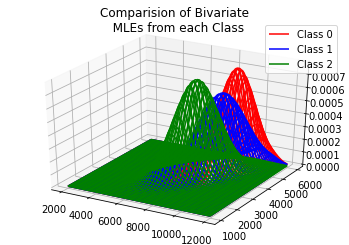



Bivariate MLE of Class 0: Cognitive normal



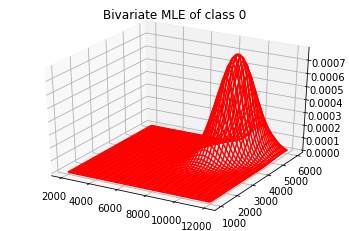



Bivariate MLE of Class 1: Mild Cognitive Impariment



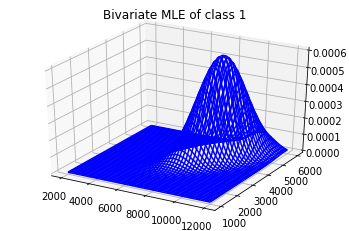



Bivariate MLE of Class 2: Alzhiemer's Disease



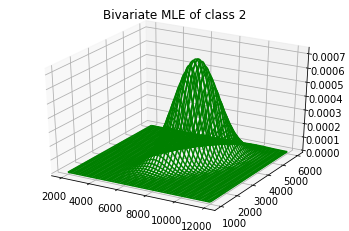

In [ ]:
print('Comparision of Bivariate MLEs by each Class', end="\n\n")
Plot.bivariatePlotterGroup()
print('')
print('')
print('Bivariate MLE of Class 0: Cognitive normal', end='\n\n')
Plot.bivariatePlotter(0)
print('')
print('')
print('Bivariate MLE of Class 1: Mild Cognitive Impariment', end="\n\n")
Plot.bivariatePlotter(1)
print('')
print('')
print("Bivariate MLE of Class 2: Alzhiemer's Disease", end="\n\n")
Plot.bivariatePlotter(2)

# **4. My Analysis in regard to the resulting figures**


---


## #**1. Analysis of Univariate MLEs for each diagnosis group**
> As above, the **"Alzheimer's Disease"** or even the **"Mild Cognitive Impariment"** are correlated with the morphological volume of the **"Hippocampus"** and the **"Entorhinal"**, as the univariate MLEs of Hippocampus and Entorhinal for each diagnosis group are showing the clear results by comparision of distribution of Probabilitiy Density Function.


---


#### **1-1. Univariate MLEs of Hippocampus for each diagnosis group**
> As below, the univariate MLEs of Hippocampus for each diagnosis group are showing different aspects for the distribution of morphological volume of Hippocampus.


---



For the total 1400 samples from the Sample Space, the number of each class' samples is below.

> Class 0 : 450

> Class 1 : 701

> Class 2 : 249

Comparing the Mean of each Class' samples of Hippocampus volume is follow.

> E(x): Sample Mean of each Class

> ***E (Class 0) > E (Class 1) > E (Class 2)***

Also, comparing the Variance of each Class's samples of Hippocampus volume is follow.

> Var(x): Variance of random variable from each Class

> ***Var(Class 1) > Var (Class 2) > Var(Class 0)***

---
As shown, the **Mean** of each class' samples of Hippocampus volume is **the Largest** from the Class 0, which is **Cognitive Normal**. On the other side, the **Mean** from the Class 2, which is **Alzheimer's Disease** 's samples of Hippocampus volume **is the smallest.** 
> **This implies that the smaller of Hippocampus volume, the worse disease is.**

Also the case of the **Variance** of samples from the each Class' of Hippocampus Volume shows that the **Class 1's Variance is the Largest.** It can be shown as because Class 1 is located for the middle of Class 0 and Class 1 from the distribtions of each class.

> **In other word, The Class 1, which is Mild Cognitive Impariment is spread out between the Cognitive Normal and Alzheimer's Disease for its distribution, as its sickness is the middle for the condition of normal and badness.**

---

Like above, the more condition of the brain gets worse, the more the volume of the Hippocampus gets smaller. It also reveals from the data of the Minimum and Maximum volume from the each Class' sample, is below.

> The Min and Max Volume for the sample of each class' Hippocampus volume.

> ***Class 0 - the Cognitive Normal***

> ***Min : 5160***
> / ***Max: 10769***

> ***Class 1 - the Mild Cognitive Impariment***

> ***Min : 3281***
> / ***Max: 9929***

> ***Class 2 - the Alzheimer's Disease***

> ***Min : 3091***
> / ***Max: 9572***
---
> As above, the smallet volume of the Hippocampus is located at Class 2, which is Alzheimer's Disease. On the other side, the largest volume of Hippocampus can be found at Class 0, which is Cognitive Normal.

---
#### **As the results,**

> The distributions of morphological volume of hippocampus for each diagnosis group are showing different aspects between the mean and variance, cleary reveals that **the volume of hippocampus is getting smaller as the condition of brain gets worse**. This shows the morphological volume of hippocampus is related to brain disease such as "Alzheimer's", as getting smaller of hippocampus shows bad results to brain.



---


---


#### **1-2. Univariate MLEs of Entorhinal for each diagnosis group**
> Like the univariate MLE of Hippocampus from each Class, the univariate MLE of Entorhinal for each diagnosis group are showing different aspects for the distribution of morphological volume of Entorhinal.


---
Comparing the Mean of each Class' samples of Entorhinal volume is follow.

> E(x): Sample Mean of each Class

> ***E (Class 0) > E (Class 1) > E (Class 2)***

Also, comparing the Variance of each Class's samples of Entorhinal volume is follow.

> Var(x): Variance of random variable from each Class

> ***Var(Class 1) > Var (Class 2) > Var(Class 0)***

---
As shown, the **Mean** of each class' samples of Entorhinal volume is **the Largest** from the Class 0, which is **Cognitive Normal**. On the other side, the **Mean** from the Class 2, which is **Alzheimer's Disease** 's samples of Entorhinal volume **is the smallest.** 
> **Like the same as the Hippocampus, this implies that the smaller of Entorhinal volume, the worse disease is.**

Also the case of the **Variance** of samples from the each Class' of Entorhinal Volume shows that the **Class 1's Variance is the Largest.** It can be shown as because Class 1 is located for the middle of Class 0 and Class 1 from the distribtions of each class.

> **As the same explaining with Hippocampus, The Class 1, which is Mild Cognitive Impariment is spread out between the Cognitive Normal and Alzheimer's Disease for its distribution, as its sickness is the middle for the condition of normal and badness.**

---

Like above, it seems to be shown the more condition of the brain gets worse, the more the volume of the Entorhinal gets smaller. However, the min and max volume of Entorhinal is vary through the Classes, is below.

> The Min and Max Volume for the sample of each class' Entorhinal volume.

> ***Class 0 - the Cognitive Normal***

> ***Min : 1870***
> / ***Max: 5731***

> ***Class 1 - the Mild Cognitive Impariment***

> ***Min : 1497***
> / ***Max: 5896***

> ***Class 2 - the Alzheimer's Disease***

> ***Min : 1426***
> / ***Max: 5430***
---
> As above, the smallet volume of the Hippocampus is located at Class 0, Cognitive Normal. Since the volume of Class 0 is spread out through the large range, the minimum value of volume is also shown at the Cognitive Normal Group. On the other side, the maximum volume for each class shows that still the minimum volume at the Alzheimer's disease, that is showing the relation between disease and the Entorhinal volume.
---
#### **As the results,**

>Like the same as Hippocampus, the comparision between the MLEs from the Classes of Entorhinal volume shows **the volumes of Entorhinal are getting smaller as the condition of the disease gets worse**, that can be said as the morphological volume of Entorhinal is related to disease like Alzheimer's, as getting smaller of Entorhinal shows the bad results to brain.


---
---

### **2. Analysis of Bivariate MLEs for each diagnosis group**
> The bivariate MLE for each diagnosis group represents the correlation between the Hippocampus and the Entorhinal, also the points that consist of both indexes are indicating the probability of Density Function. 

>One of the big difference between univariate MLE and bivariate MLE is that the bivariate MLE formula contains the covariance between two categorized value, the Hippocampus and the Entorhinal. 

>The comparision between bivariate MLEs for each diagnosis group are not only showing different aspects for the distribution of each Hippocampus and Entorhinal morphological volume, but also for the covariance between the two categorized volumes.


---


#### **2-1. Comparing the Covariance for each diagnosis group**
Each Class' covariance between Hippocampus and Entorhinal volume is below

> Covariance(ClassX) : The Covariance between Hippocampus and Entorhinal of each class.

> ***Covariance(Class 1) > Covariance(Class 2) > Covariance(Class 0)***

> **526573.16 > 426044.03** > 255492.22

---

As above, the Covariance between Hippocampus and Entorhinal is different between each classes, that shows the Class 1's covariance is the largest while the Class 0's covariance is the smallest. It represents that the correlation between the Hippocampus and Entorhinal volume is the biggest at the Mild Cognitive Impariment Group, next for the Alzheimer's disease.

> The Correlation between the volume of Hippocampus and Entorhinal stand out at the Mild Coginitive Impariment Group and Alzheimer's Disease compare to Cognitive Normal Group. **It shows that the correlation between Hippocampus and Entorhinal is getting important as the disease get worse, while at the Normal condition group has less importance of correlation.**

---
#### **2-2. Comparing the sag for each plotted graph of diagnosis group**

At the Plot of each bivariate MLE, each class' graph is showing different aspects for the probability distribution.

**Above the Graphs,**

>By the axes for Hippocampus, the range is set 2000 to 12000, that the near by minimum and maximum volume for Hippocampus from all samples. The axes for Entorhinal's range is set to 1000 to 6000, that the near by minimum and maximum volume for Entorhinal from all samples.

*At the Axes of Hippocampus Volume*
> At the axes that indicating the Hippocampus which range is set to 2000 to 12000 for the left to the right, the graph of Class 2 leans to the left than others, the Class 1 is second and the Class 0 is third.

*At the Axes of Entorhinal Volume*

> At the axes that indicating the Entorhinal which range is set to 1000 to 6000 for the left to the right, also the graph of Class 2 leans to the left than the others, the Class 1 is second and the Class 0 is the third.
---
> **The Sag of the graph above shows that the Hippocampus and the Entorhinal is related to the degree of the disease, as getting worse condition of the brain cause the smaller volume for both Hippocampus and Entorhinal.**
---
---
## Summary
The above result is showing that the brain disease like Alzheimer's and Mild Cognitive Impariment comparing to the Cognitive normal are closely related to the volume of specific part of the brain, the Hippocampus and the Entorhinal.

Comparing the diagnosis groups, it is shown by the volume of each Hippocampus and the Entorhinal are both related to its distribution of MLE, that represents the smaller of each volume of Hippocampus and Entorhinal, the worse of brain condition.

In addition, at the bivariate MLE shows that the correlations between the Hippocampus and the Entorhinal are vary for each diagnosis group, that the Alzheimier's Disease and Mild Cognitive Normal group have the much more correlated relations of the Hippocampus and the Entorhinal than the Cognitive normal group.